# Data loading, distribution and analysis.

In [67]:
#Libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and analysis.

In [68]:
data = pd.read_csv('./spaceship-titanic-data/train.csv')
data_test = pd.read_csv('./spaceship-titanic-data/test.csv')
data.columns = ["passenger_id", "home_planet", "cryo_sleep", "cabin", "destination", "age", "vip", "room_service", "food_court", "shopping_mall", "spa", "vr_deck", "name", "transported"]
data_test.columns = ["passenger_id", "home_planet", "cryo_sleep", "cabin", "destination", "age", "vip", "room_service", "food_court", "shopping_mall", "spa", "vr_deck", "name"]
data.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Checking statistics of the data.

In [69]:
data.describe()

,age,room_service,food_court,shopping_mall,spa,vr_deck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Here we can appreciate some of the values that may help to replace null data in the future, however, it is important to take into account that the mean and other values related may be skewed and that this could result in an incorrect model.

Checking if null data exists.

In [70]:
data.isna().sum()

passenger_id       0
home_planet      201
cryo_sleep       217
cabin            199
destination      182
age              179
vip              203
room_service     181
food_court       183
shopping_mall    208
spa              183
vr_deck          188
name             200
transported        0
dtype: int64

Ideas to get rid of null data: <br>- Since Kaggle doesn't allow to eliminate null registers: `home_planet`, `cryo_sleep`, `destination` and `vip` could be replaced with the most frequent planet (mode),<br>- `name` can be omitted since it may not be significant while determining the `transported` result, `age`can be replaced with the mean, <br>- `age`, `room_service`, `food_court`, `shopping_mall`, `spa` and `vr_deck` may replace its null values with the median which is a stable metric that may reduce de bias in the data, <br>- Now, for the `passenger_id` column the value of the group (which is the number after the `_` character) will be extracted and used in a new column called `passenger_group`, <br>- Finally, the column `cabin` will be splitted in two columns: `deck` which will store the first value of the entire cabin number, and the column `side` which stores the final value of the cabin number.

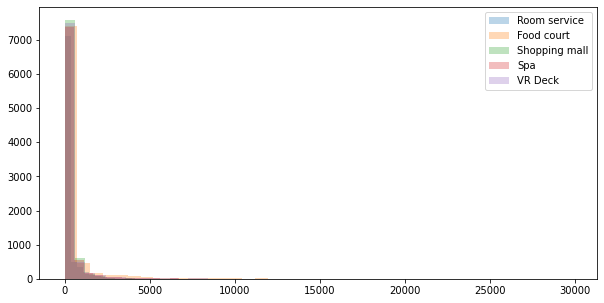

In [71]:
plt.figure(figsize=(10, 5))
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(data['room_service'], **kwargs, label="Room service")
plt.hist(data['food_court'], **kwargs, label="Food court")
plt.hist(data['shopping_mall'], **kwargs, label="Shopping mall")
plt.hist(data['spa'], **kwargs, label="Spa")
plt.hist(data['vr_deck'], **kwargs, label="VR Deck")
plt.legend()

plt.show()

As shown by the graph, the values related to service consumption have pretty much the same distribution so a transformation per se may not be needed.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='room_service', ylabel='age'>,
        <AxesSubplot:xlabel='food_court', ylabel='age'>,
        <AxesSubplot:xlabel='shopping_mall', ylabel='age'>,
        <AxesSubplot:xlabel='spa', ylabel='age'>,
        <AxesSubplot:xlabel='vr_deck', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='room_service'>,
        <AxesSubplot:xlabel='room_service', ylabel='room_service'>,
        <AxesSubplot:xlabel='food_court', ylabel='room_service'>,
        <AxesSubplot:xlabel='shopping_mall', ylabel='room_service'>,
        <AxesSubplot:xlabel='spa', ylabel='room_service'>,
        <AxesSubplot:xlabel='vr_deck', ylabel='room_service'>],
       [<AxesSubplot:xlabel='age', ylabel='food_court'>,
        <AxesSubplot:xlabel='room_service', ylabel='food_court'>,
        <AxesSubplot:xlabel='food_court', ylabel='food_court'>,
        <AxesSubplot:xlabel='shopping_mall', ylabel='food_court'>,
        <AxesSubplot:xlabel='s

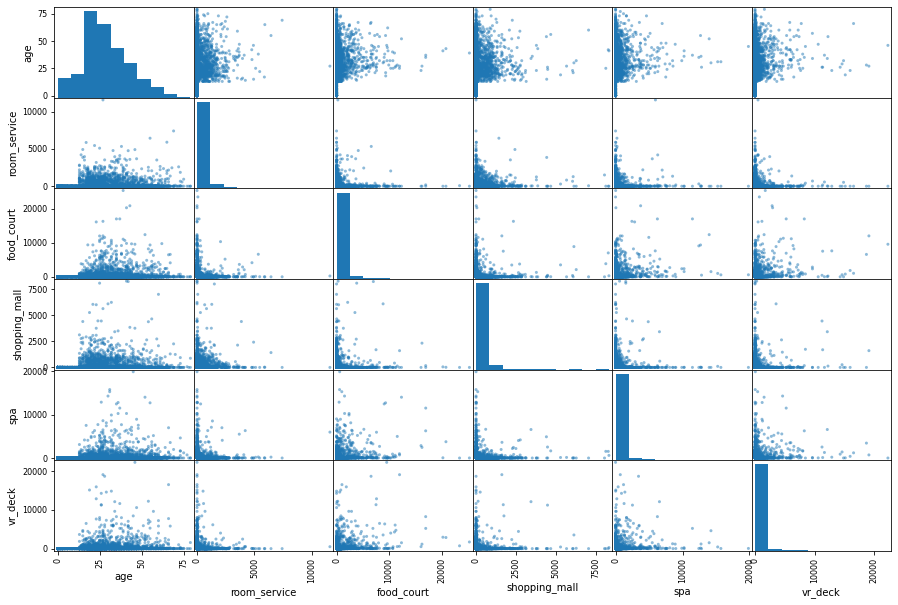

In [72]:
#Scatter matrix of all dat except for the transported column to avoid errors
pd.plotting.scatter_matrix(data_test, figsize=(15, 10))

None of the values have a linear relationship and since what is needed is a model that classifies, linear regression won't be taken into consideration.

## Data distribution.

We can only really see a decent distribution with `home_planet`, `age` and `destination` so let's compare their distributions to see if data will need a transformation.

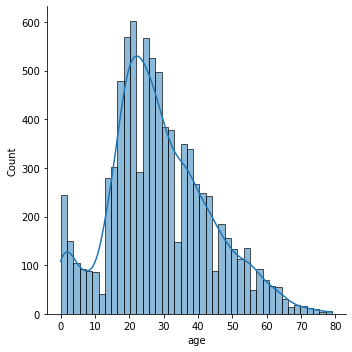

In [73]:
#Age distribution
sns.displot(data['age'], kde=True)

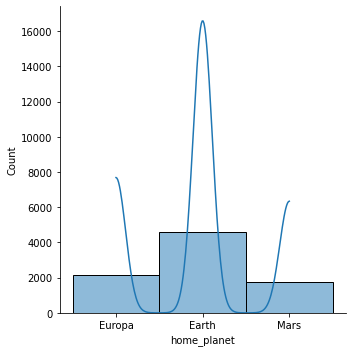

In [74]:
#Home planet distribution
sns.displot(data['home_planet'], kde=True)

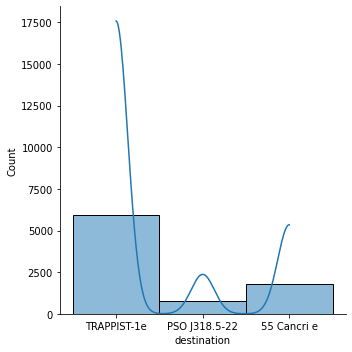

In [75]:
#Destination distribution
sns.displot(data['destination'], kde=True)

Since `home_planet` and `destination` are categorical data `age`is the only column that may need a transformation. It is important to consider that both categorical columns will need to be transformed to numerical data to match the model.

# Data preprocessing.

## Restructuring data.

In [76]:
data.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Fisrt of all, the `passenger_group` column will be created usin the digit after the `_` character in `passenger_id`, this indicates to which group does the passenger belog to which may be important to determine if the passenger was transported or not.

In [77]:
p_id = data['passenger_id']
data['passenger_group'] = data['passenger_id'].str.split('_', expand=True)[1]
data.drop(['passenger_id'], axis=1, inplace=True)

p_id_Test = data_test['passenger_id']
data_test['passenger_group'] = data_test['passenger_id'].str.split('_', expand=True)[1]
data_test.drop(['passenger_id'], axis=1, inplace=True)

The final column remains as:

In [78]:
data.head()

,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported,passenger_group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01


The same will be done for the columns of `deck` and `side`:

In [79]:
data['deck'] = data['cabin'].str.split('/', expand=True)[0]
data['side'] = data['cabin'].str.split('/', expand=True)[2]
data.drop(['cabin'], axis=1, inplace=True)

data_test['deck'] = data_test['cabin'].str.split('/', expand=True)[0]
data_test['side'] = data_test['cabin'].str.split('/', expand=True)[2]
data_test.drop(['cabin'], axis=1, inplace=True)

In [80]:
data.head()

,home_planet,cryo_sleep,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported,passenger_group,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01,F,S


## Missing values.

Checking what columns have missing values.

In [81]:
data.isna().sum()

home_planet        201
cryo_sleep         217
destination        182
age                179
vip                203
room_service       181
food_court         183
shopping_mall      208
spa                183
vr_deck            188
name               200
transported          0
passenger_group      0
deck               199
side               199
dtype: int64

In [82]:
data_test.columns.values

array(['home_planet', 'cryo_sleep', 'destination', 'age', 'vip',
       'room_service', 'food_court', 'shopping_mall', 'spa', 'vr_deck',
       'name', 'passenger_group', 'deck', 'side'], dtype=object)

Replacing missing values with its mode as commentes on the [Data loading and analysis](#data-loading-and-analysis) section.

In [83]:
data['home_planet'] = data['home_planet'].fillna(data['home_planet'].mode()[0])
data['cryo_sleep'] = data['cryo_sleep'].fillna(data['cryo_sleep'].mode()[0])
data['destination'] = data['destination'].fillna(data['destination'].mode()[0])
data['vip'] = data['vip'].fillna(data['vip'].mode()[0])
data['deck'] = data['deck'].fillna(data['deck'].mode()[0])
data['side'] = data['side'].fillna(data['side'].mode()[0])
data.drop(['name'], axis=1, inplace=True)
Y_train = data['transported']


data_test['home_planet'] = data_test['home_planet'].fillna(data_test['home_planet'].mode()[0])
data_test['cryo_sleep'] = data_test['cryo_sleep'].fillna(data_test['cryo_sleep'].mode()[0])
data_test['destination'] = data_test['destination'].fillna(data_test['destination'].mode()[0])
data_test['vip'] = data_test['vip'].fillna(data_test['vip'].mode()[0])
data_test['deck'] = data_test['deck'].fillna(data_test['deck'].mode()[0])
data_test['side'] = data_test['side'].fillna(data_test['side'].mode()[0])
data_test.drop(['name'], axis=1, inplace=True)

The remaining values where thought to be replaced with the mean, but since their distributions may be skewed (as seen in the outliers on the boxplot below), the best option is to use the median since is a more stable value. (after finalizing the model, the mode was a better option to this particular case)

<AxesSubplot:>

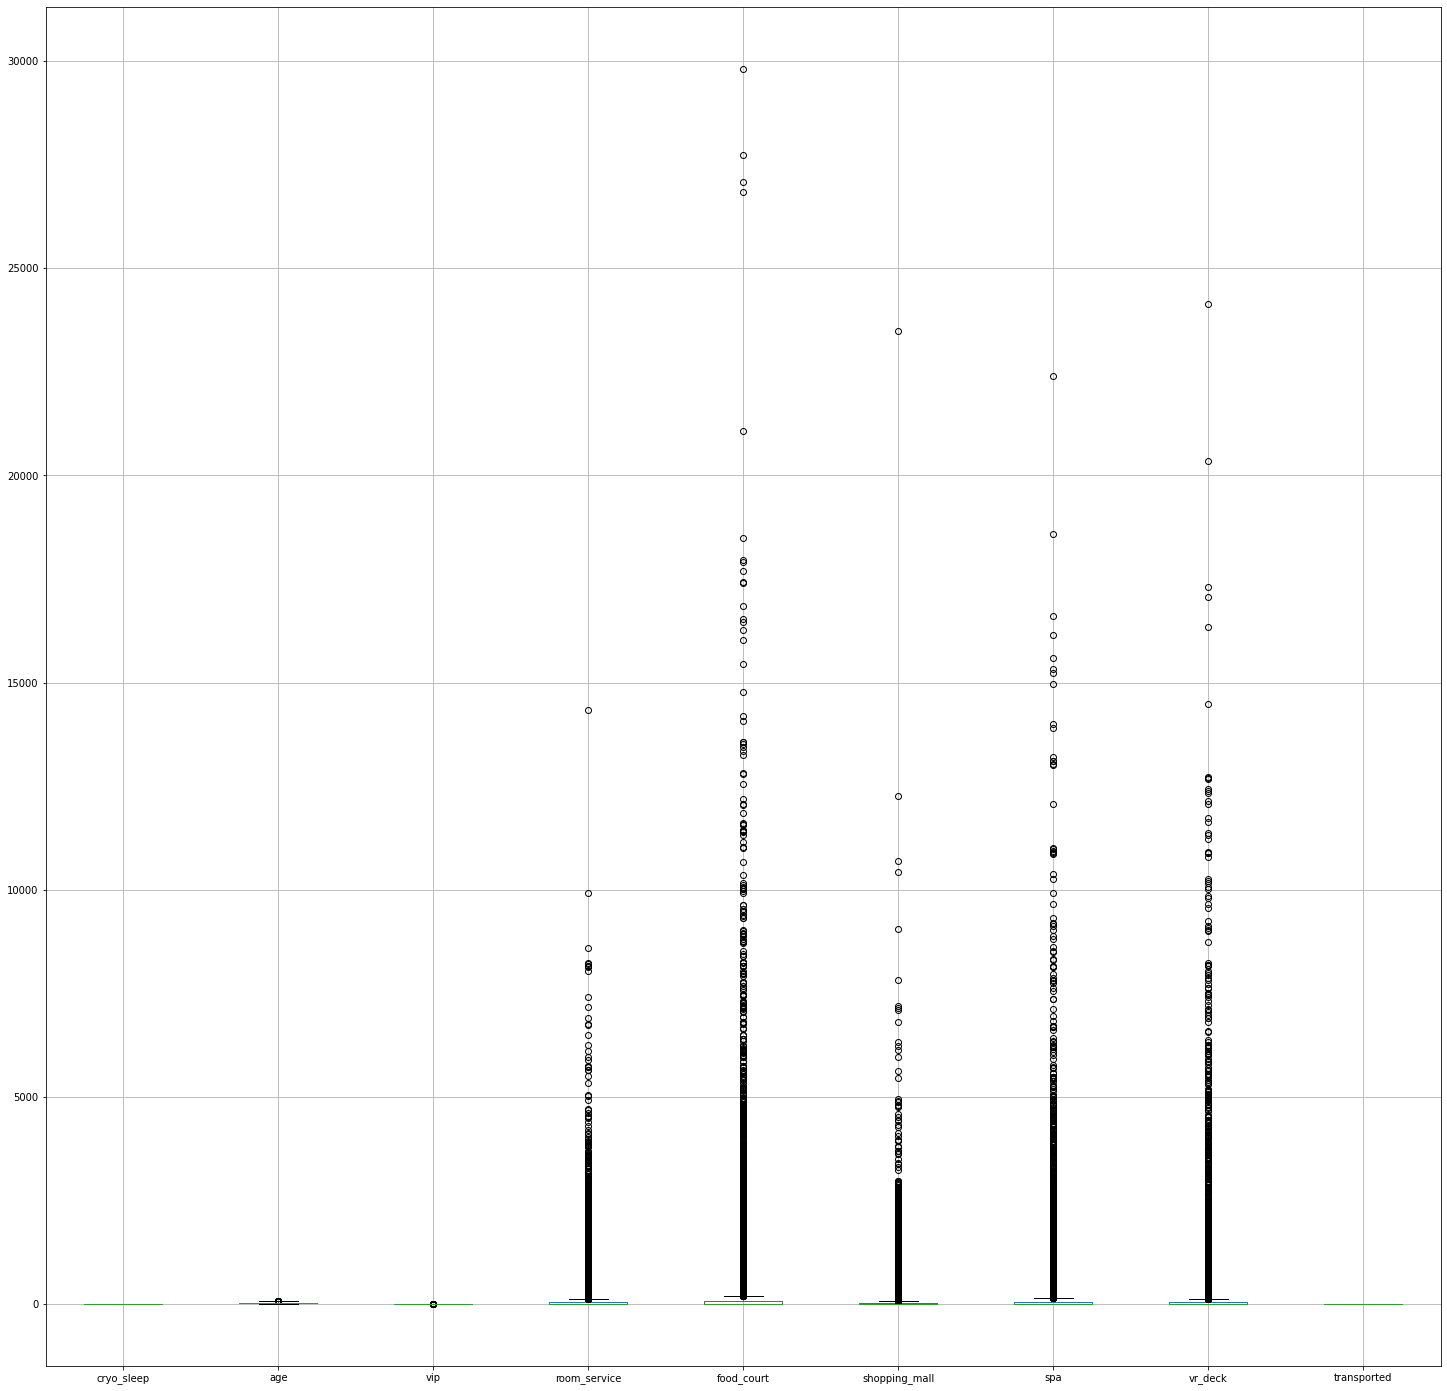

In [84]:
data.boxplot(figsize=(25, 25))

In [85]:
data.isna().sum()

home_planet          0
cryo_sleep           0
destination          0
age                179
vip                  0
room_service       181
food_court         183
shopping_mall      208
spa                183
vr_deck            188
transported          0
passenger_group      0
deck                 0
side                 0
dtype: int64

To avoid bias in the model, the dataset will be splitted in two: a dataset that has passengers with `cryo_sleep` as `True` and a dataset that has passengers with `cryo_sleep` as `False` since this may affect the distributions of the money they spend.

In [86]:
data_cryo = data[data['cryo_sleep'] == True]
data_no_cryo = data[data['cryo_sleep'] == False]

data_cryo_test = data_test[data_test['cryo_sleep'] == True]
data_no_cryo_test = data_test[data_test['cryo_sleep'] == False]

Now the missing values can be replaced.

In [87]:
data_no_cryo['age'] = data_no_cryo['age'].fillna(data_no_cryo['age'].mode()[0])
data_no_cryo['room_service'] = data_no_cryo['room_service'].fillna(data_no_cryo['room_service'].mode()[0])
data_no_cryo['food_court'] = data_no_cryo['food_court'].fillna(data_no_cryo['food_court'].mode()[0])
data_no_cryo['shopping_mall'] = data_no_cryo['shopping_mall'].fillna(data_no_cryo['shopping_mall'].mode()[0])
data_no_cryo['spa'] = data_no_cryo['spa'].fillna(data_no_cryo['spa'].mode()[0])
data_no_cryo['vr_deck'] = data_no_cryo['vr_deck'].fillna(data_no_cryo['vr_deck'].mode()[0])

C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1884430089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_cryo['age'] = data_no_cryo['age'].fillna(data_no_cryo['age'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1884430089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_cryo['room_service'] = data_no_cryo['room_service'].fillna(data_no_cryo['room_service'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1884430089.py:3: SettingWithCopyWarning: 
A value

In [88]:
data_cryo['age'] = data_cryo['age'].fillna(data_cryo['age'].mode()[0])
data_cryo['room_service'] = data_cryo['room_service'].fillna(data_cryo['room_service'].mode()[0])
data_cryo['food_court'] = data_cryo['food_court'].fillna(data_cryo['food_court'].mode()[0])
data_cryo['shopping_mall'] = data_cryo['shopping_mall'].fillna(data_cryo['shopping_mall'].mode()[0])
data_cryo['spa'] = data_cryo['spa'].fillna(data_cryo['spa'].mode()[0])
data_cryo['vr_deck'] = data_cryo['vr_deck'].fillna(data_cryo['vr_deck'].mode()[0])

C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\505373957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cryo['age'] = data_cryo['age'].fillna(data_cryo['age'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\505373957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cryo['room_service'] = data_cryo['room_service'].fillna(data_cryo['room_service'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\505373957.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [89]:
data_no_cryo_test['age'] = data_no_cryo_test['age'].fillna(data_no_cryo_test['age'].mode()[0])
data_no_cryo_test['room_service'] = data_no_cryo_test['room_service'].fillna(data_no_cryo_test['room_service'].mode()[0])
data_no_cryo_test['food_court'] = data_no_cryo_test['food_court'].fillna(data_no_cryo_test['food_court'].mode()[0])
data_no_cryo_test['shopping_mall'] = data_no_cryo_test['shopping_mall'].fillna(data_no_cryo_test['shopping_mall'].mode()[0])
data_no_cryo_test['spa'] = data_no_cryo_test['spa'].fillna(data_no_cryo_test['spa'].mode()[0])
data_no_cryo_test['vr_deck'] = data_no_cryo_test['vr_deck'].fillna(data_no_cryo_test['vr_deck'].mode()[0])

C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1435547598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_cryo_test['age'] = data_no_cryo_test['age'].fillna(data_no_cryo_test['age'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1435547598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_cryo_test['room_service'] = data_no_cryo_test['room_service'].fillna(data_no_cryo_test['room_service'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\1435547598.py:3: Se

In [90]:
data_cryo_test['age'] = data_cryo_test['age'].fillna(data_cryo_test['age'].mode()[0])
data_cryo_test['room_service'] = data_cryo_test['room_service'].fillna(data_cryo_test['room_service'].mode()[0])
data_cryo_test['food_court'] = data_cryo_test['food_court'].fillna(data_cryo_test['food_court'].mode()[0])
data_cryo_test['shopping_mall'] = data_cryo_test['shopping_mall'].fillna(data_cryo_test['shopping_mall'].mode()[0])
data_cryo_test['spa'] = data_cryo_test['spa'].fillna(data_cryo_test['spa'].mode()[0])
data_cryo_test['vr_deck'] = data_cryo_test['vr_deck'].fillna(data_cryo_test['vr_deck'].mode()[0])

C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\2099149813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cryo_test['age'] = data_cryo_test['age'].fillna(data_cryo_test['age'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\2099149813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cryo_test['room_service'] = data_cryo_test['room_service'].fillna(data_cryo_test['room_service'].mode()[0])
C:\Users\xmuse\AppData\Local\Temp\ipykernel_21428\2099149813.py:3: SettingWithCopyWarni

And now there are no missing variables:

In [91]:
data_cryo.isna().sum()

home_planet        0
cryo_sleep         0
destination        0
age                0
vip                0
room_service       0
food_court         0
shopping_mall      0
spa                0
vr_deck            0
transported        0
passenger_group    0
deck               0
side               0
dtype: int64

Finally, both datasets are concatenated to have them together again.

In [92]:
data = pd.concat([data_cryo, data_no_cryo], axis=0).sort_index(axis=0)
data_test = pd.concat([data_cryo_test, data_no_cryo_test], axis=0).sort_index(axis=0)
data


,home_planet,cryo_sleep,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,transported,passenger_group,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,01,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,01,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,01,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,01,E,S


## Preparation of the data for the model.

After viewing and analyzing the data in the sections before, the conclusion is that a classifier model was needed, two options were considered: a decision tree and a random forest. For this iteration a random forest will be used since it can have better results than a single decision tree.

To prepare our data for a random forest we need to get rid of categorical data, this will be donde using the one-hot encoding technique.

In [93]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

#Making one-hot encoding for the data values
data[ohe.categories_[0]] = ohe.fit_transform(data[['home_planet']])
data[ohe.categories_[0]] = ohe.fit_transform(data[['deck']])
data[ohe.categories_[0]] = ohe.fit_transform(data[['side']])
data[ohe.categories_[0]] = ohe.fit_transform(data[['destination']])

#Mapping 0 to false and 1 to true
data['cryo_sleep'] = data['cryo_sleep'].map({True: 1, False: 0})
data['vip'] = data['vip'].map({True: 1, False: 0})
data['transported'] = data['transported'].map({True: 1, False: 0})

#Dropping the values that were one-hot encoded
data.drop(['home_planet', 'destination', 'deck', 'side'], axis=1, inplace=True)

#Changing the type of the passenger_group column
data["passenger_group"] = data["passenger_group"].astype('int64')
data.head()

#Making one-hot encoding for the data values
data_test[ohe.categories_[0]] = ohe.fit_transform(data_test[['home_planet']])
data_test[ohe.categories_[0]] = ohe.fit_transform(data_test[['deck']])
data_test[ohe.categories_[0]] = ohe.fit_transform(data_test[['side']])
data_test[ohe.categories_[0]] = ohe.fit_transform(data_test[['destination']])

#Mapping 0 to false and 1 to true
data_test['cryo_sleep'] = data_test['cryo_sleep'].map({True: 1, False: 0})
data_test['vip'] = data_test['vip'].map({True: 1, False: 0})

#Dropping the values that were one-hot encoded
data_test.drop(['home_planet', 'destination', 'deck', 'side'], axis=1, inplace=True)

#Changing the type of the passenger_group column
data_test["passenger_group"] = data_test["passenger_group"].astype('int64')
data_test.head()

,cryo_sleep,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,passenger_group,Earth,...,D,E,F,G,T,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [94]:
data.isna().sum()

cryo_sleep         0
age                0
vip                0
room_service       0
food_court         0
shopping_mall      0
spa                0
vr_deck            0
transported        0
passenger_group    0
Earth              0
Europa             0
Mars               0
A                  0
B                  0
C                  0
D                  0
E                  0
F                  0
G                  0
T                  0
P                  0
S                  0
55 Cancri e        0
PSO J318.5-22      0
TRAPPIST-1e        0
dtype: int64

# Making the model.

As stated before, the model that will be used is a random forest. The best hiperparameters achieved were 25 trees with amaximum of 18 leaf nodes. We are using the `warm_start=True` parameter to build the new trees that will populate our forest based on the information used on the previous tree so the model may be learning while building itself.

In [96]:
data.head()

,cryo_sleep,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,transported,passenger_group,...,D,E,F,G,T,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [97]:
data["spa"].max()

22408.0

In [100]:
data.head()

,cryo_sleep,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,transported,passenger_group,...,D,E,F,G,T,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Correlational Matrix Analysis

In [101]:
matriz_corr = data.corr()
matriz_corr

,cryo_sleep,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,transported,passenger_group,...,D,E,F,G,T,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
cryo_sleep,1.000000,-0.077452,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,0.063291,...,-0.066678,-0.110644,-0.209035,0.241399,-0.017579,-0.023858,0.023858,0.065589,0.087764,-0.113380
age,-0.077452,1.000000,0.092679,0.070080,0.128213,0.034664,0.121465,0.100408,-0.076175,-0.131982,...,0.076120,0.028808,-0.015048,-0.210914,0.013889,-0.011299,0.011299,0.016589,-0.027917,0.002906
vip,-0.078281,0.092679,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,0.000703,...,0.067678,-0.012912,-0.054256,-0.098863,-0.003672,0.008798,-0.008798,0.045167,-0.000592,-0.039617
room_service,-0.244089,0.070080,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.021750,...,0.160699,0.043935,0.092507,-0.145289,0.007525,0.006991,-0.006991,-0.023441,-0.063354,0.060680
food_court,-0.205928,0.128213,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,0.023265,...,0.020128,-0.038889,-0.129681,-0.149911,0.014267,-0.019682,0.019682,0.134952,-0.065400,-0.078269
shopping_mall,-0.207798,0.034664,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.038582,...,0.054823,0.031747,0.070135,-0.108538,-0.006787,0.020940,-0.020940,-0.013739,-0.031245,0.031855
spa,-0.198307,0.121465,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,0.016767,...,0.033486,-0.011736,-0.077820,-0.124342,0.036316,-0.005700,0.005700,0.075096,-0.053303,-0.032897
vr_deck,-0.192721,0.100408,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.009686,...,-0.003542,-0.017905,-0.095178,-0.127434,0.012369,0.009089,-0.009089,0.089667,-0.044861,-0.051119
transported,0.460132,-0.076175,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.066390,...,-0.034046,-0.097965,-0.086360,0.016269,-0.014568,-0.101397,0.101397,0.108722,0.000092,-0.096319
passenger_group,0.063291,-0.131982,0.000703,-0.021750,0.023265,-0.038582,0.016767,0.009686,0.066390,1.000000,...,0.001678,-0.042257,-0.101212,0.035680,-0.011783,-0.011956,0.011956,0.050093,-0.046971,-0.014750


#### Heatmap of the correlation between variables

<AxesSubplot:>

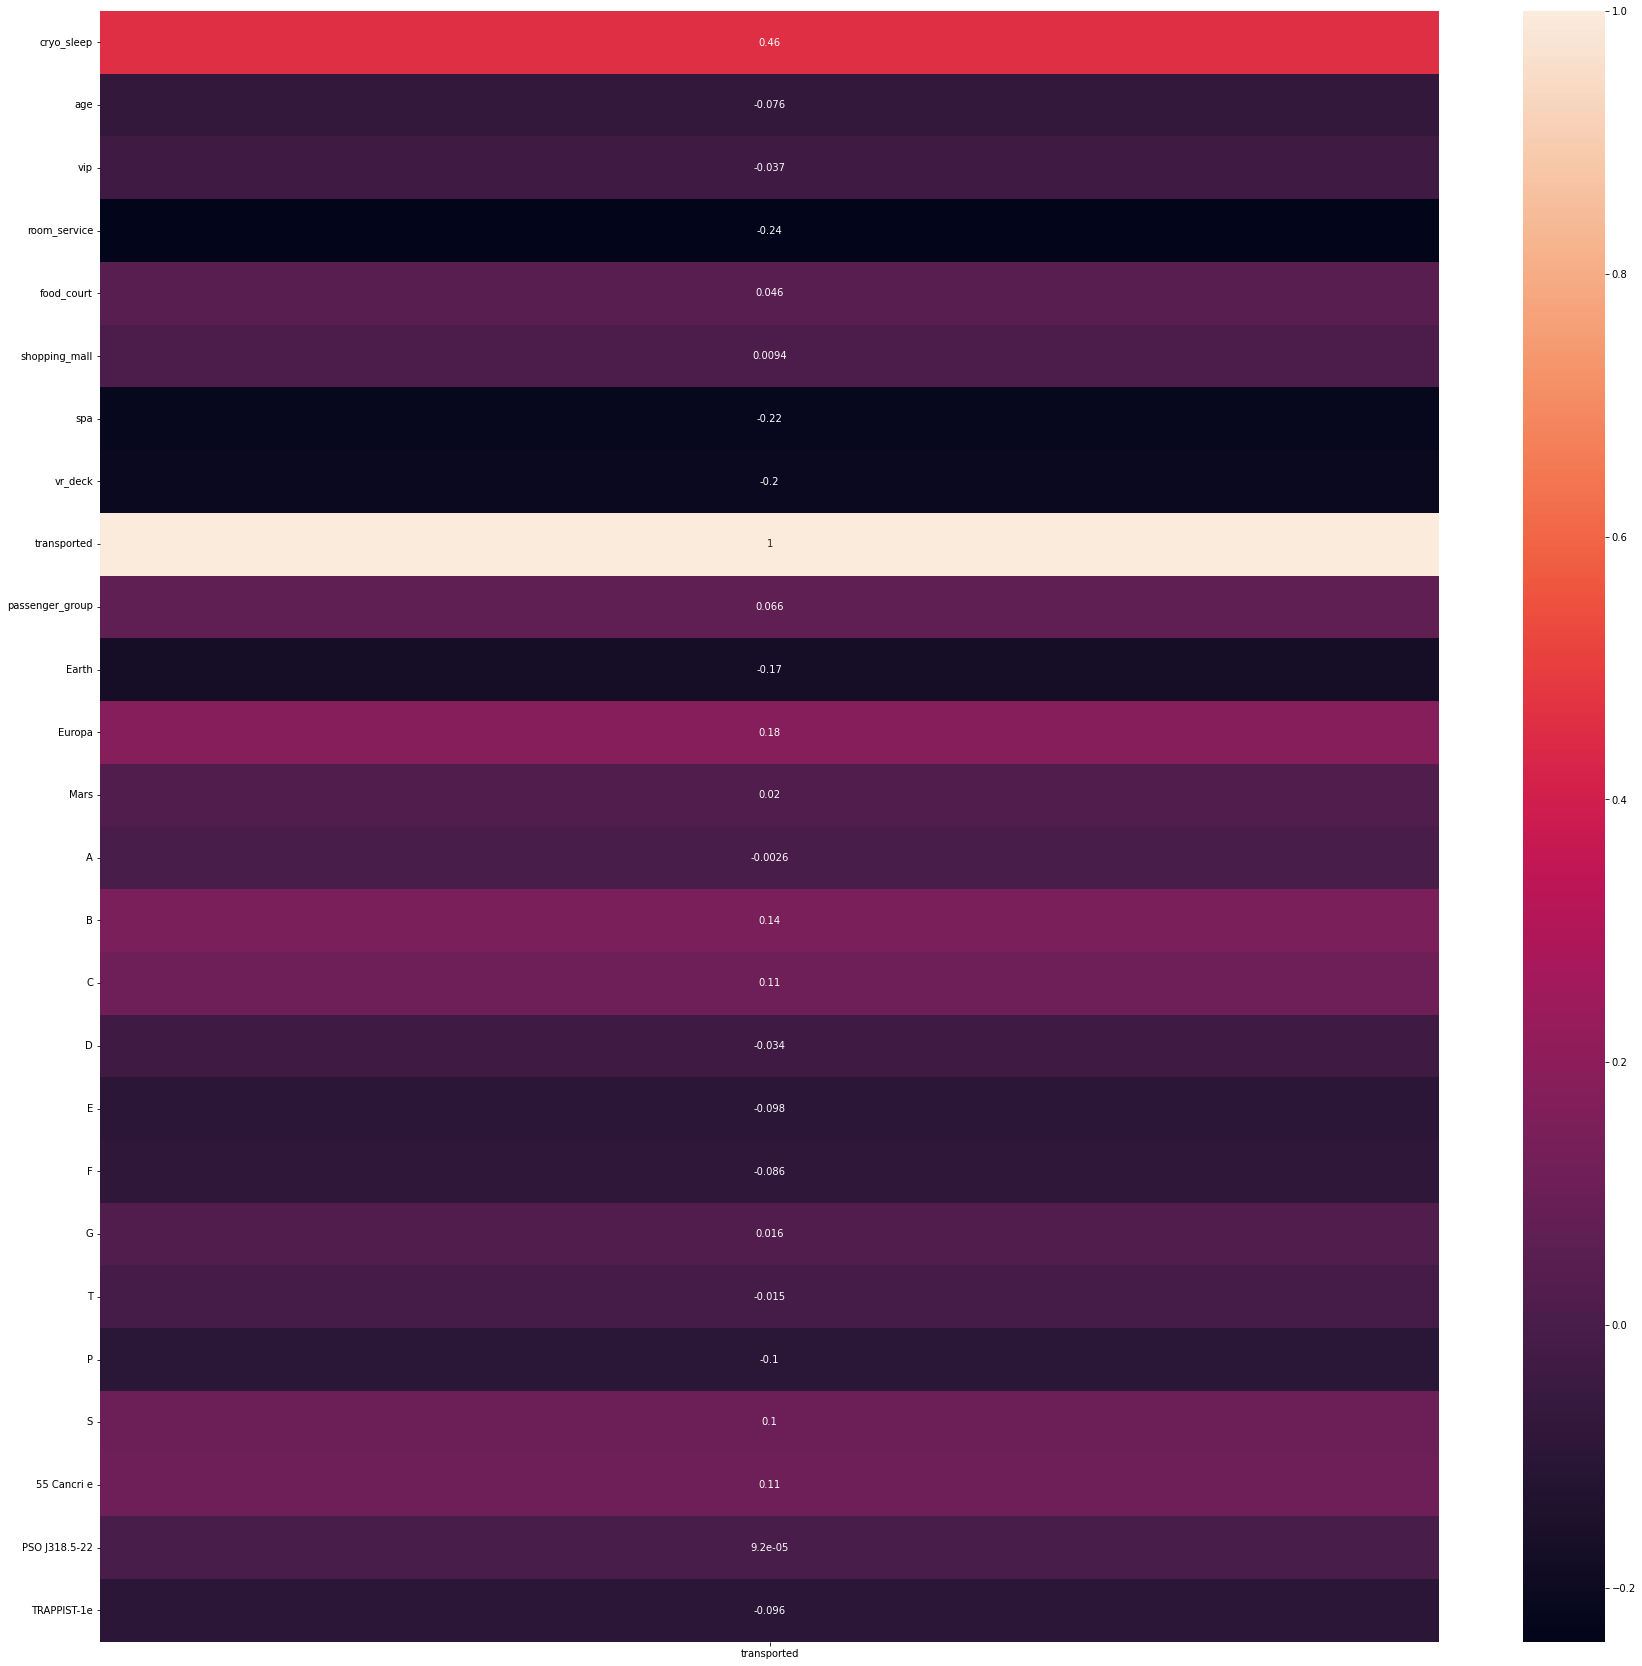

In [102]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(matriz_corr[['transported']],annot=True)

# Final Model

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier



X = data.drop(['transported'],axis=1)
Y = data['transported']

clf = XGBClassifier(base_score=0.08, booster='gbtree', learning_rate=0.090000012, max_depth=6, n_estimators=100) #0.80757  #score 0.8402162659611181

clf.fit(X, Y)


YPredict = clf.predict(data_test)
clf.score(X, Y)

0.8402162659611181

In [113]:
pd.Series(clf.feature_importances_,X.columns)

cryo_sleep         0.469340
age                0.009411
vip                0.007643
room_service       0.037674
food_court         0.027763
shopping_mall      0.020757
spa                0.036955
vr_deck            0.035083
passenger_group    0.005159
Earth              0.110759
Europa             0.046192
Mars               0.015520
A                  0.011108
B                  0.016315
C                  0.018971
D                  0.011467
E                  0.024575
F                  0.028899
G                  0.017460
T                  0.000000
P                  0.013812
S                  0.000000
55 Cancri e        0.007651
PSO J318.5-22      0.018097
TRAPPIST-1e        0.009388
dtype: float32

Important Features for our model, order by importance

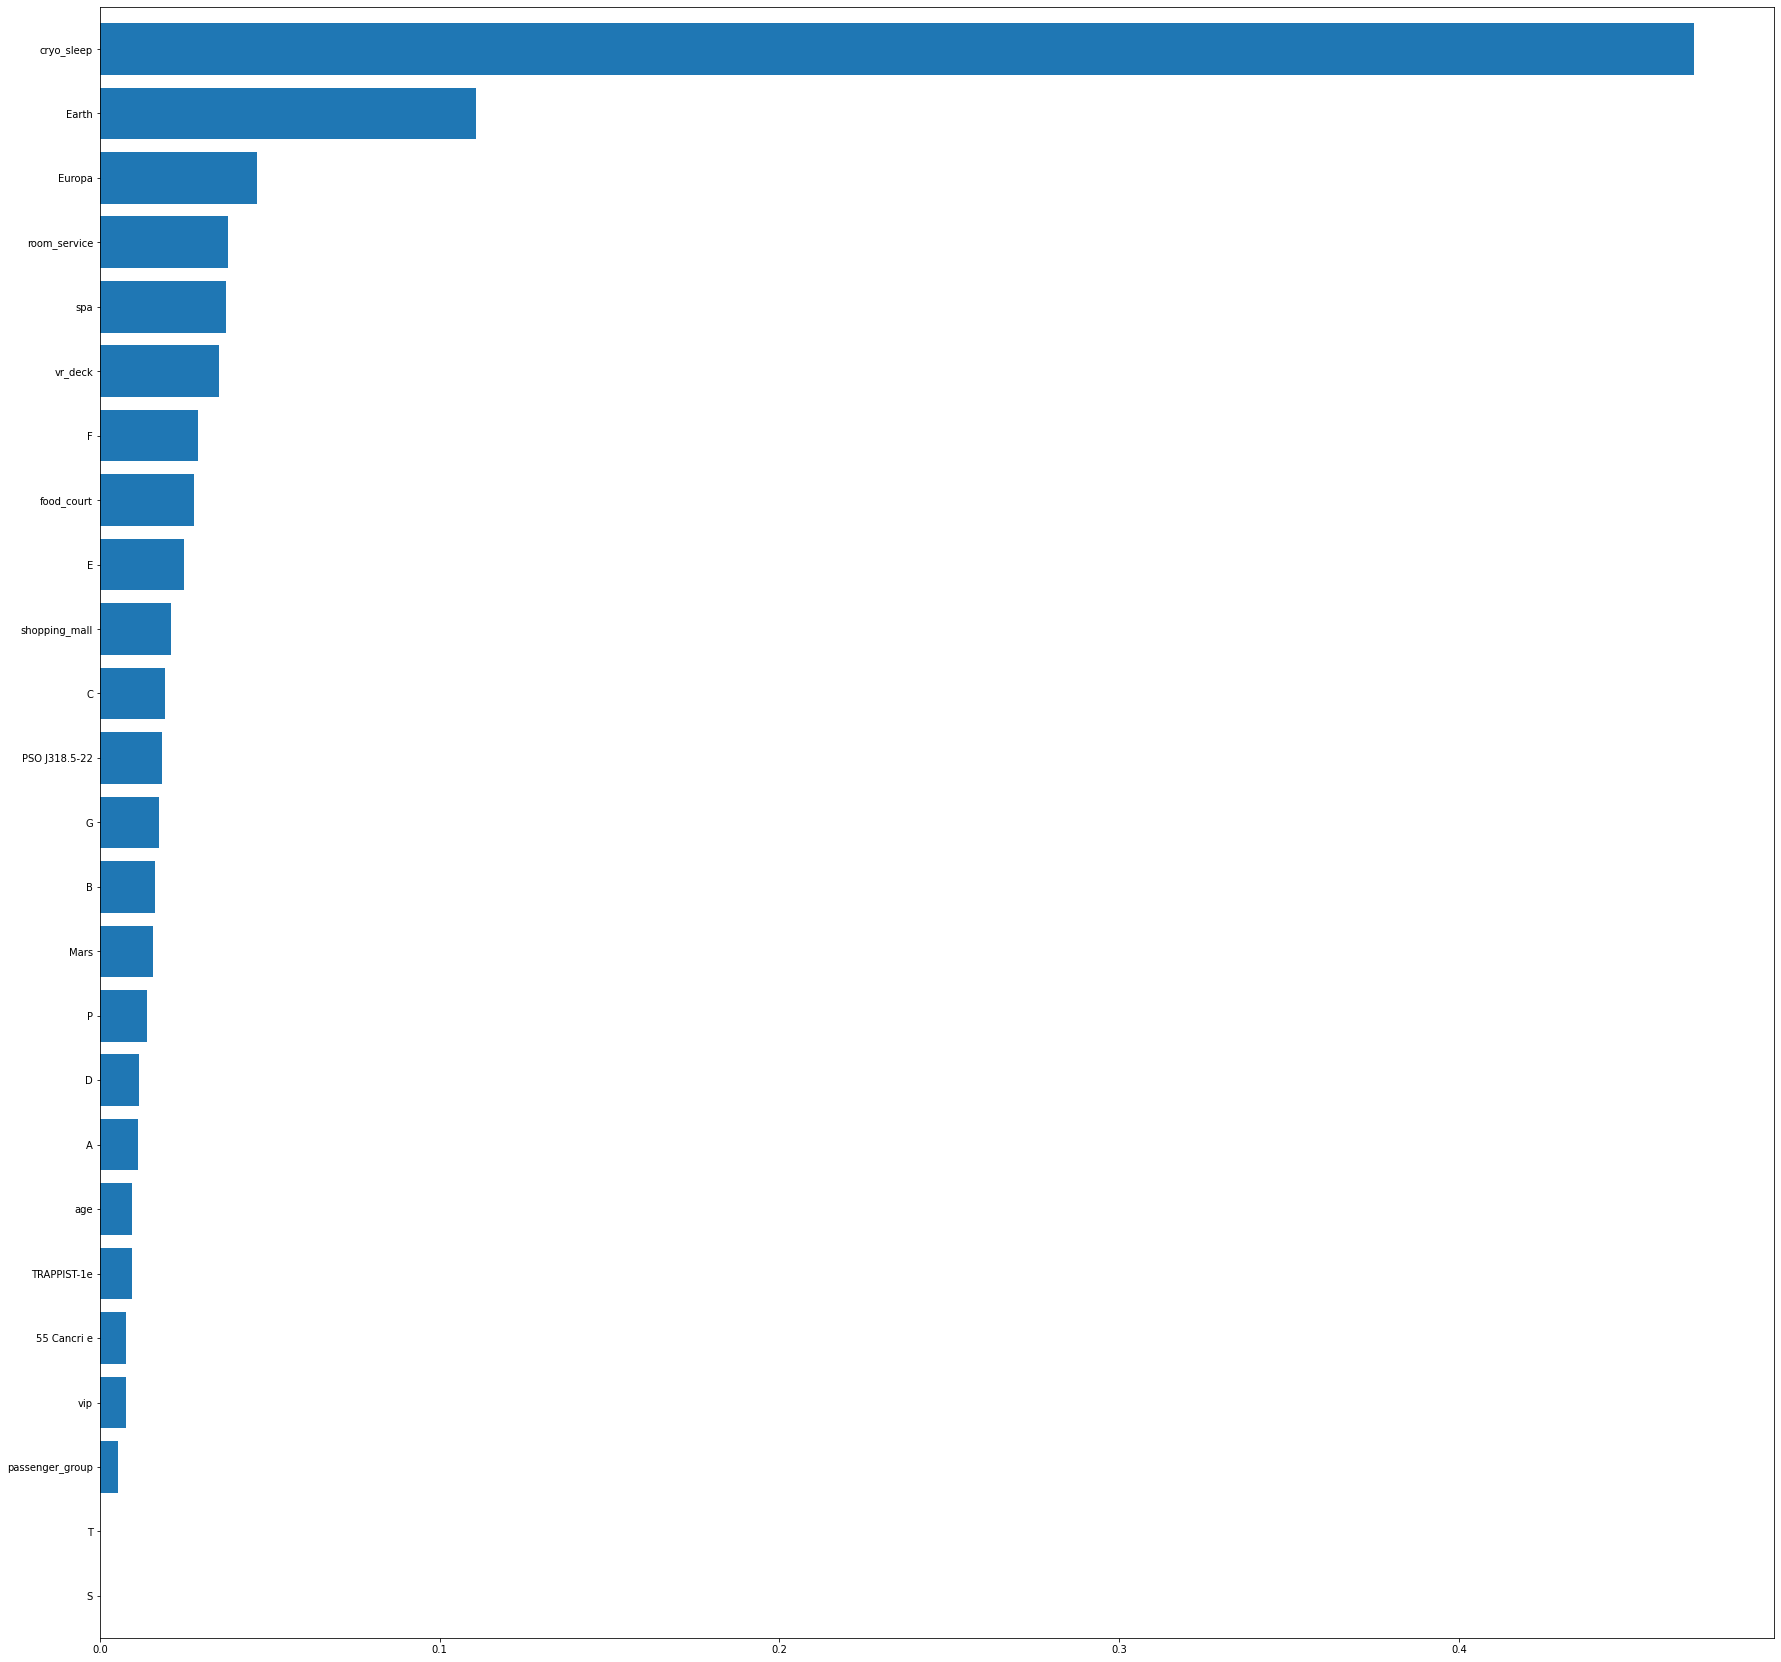

In [114]:
plt.figure(figsize=(30,30))
importance = pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,figsize=(30,30))

Now, the model is ready to make predictions:

In [116]:
Y_pred = pd.DataFrame(YPredict)
Y_pred[0] = Y_pred[0].map({0: False, 1: True})
Y_pred

,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


# Building the final submission.

After predicting the target column with our model, the final submission can be built to submit it to Kaggle.

In [117]:
p_id_Test = pd.DataFrame(p_id_Test)
p_id_Test

,passenger_id
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [118]:
final_df = pd.concat([p_id_Test['passenger_id'], Y_pred[0]], axis=1, keys=['PassengerId', 'Transported'])
final_df


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [119]:
final_df.to_csv('submission.csv', index=False)

The submission is exported and ready to submit.

# Exporting the model.

Now everything that is left is to export the model in a file to use in the server of the application.

In [120]:
import joblib

joblib.dump(clf, 'XGBoostFinal')

['XGBoost model']